In [1]:
import numpy
import pandas
import tensorflow as tf
 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

models =  tf.keras.models
layers = tf.keras.layers 
scikit_learn = tf.keras.wrappers.scikit_learn



/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
Sequential = models.Sequential
Dense = layers.Dense
KerasClassifier = scikit_learn.KerasClassifier
to_categorical = tf.keras.utils.to_categorical

In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:

def load_data():
    dataframe = pandas.read_csv("iris.csv", header=None)
    dataset = dataframe.values
    # split into input (X) and output (Y) variables
    X = dataset[:,0:4].astype(float)
    Y = dataset[:,4]
    le = LabelEncoder()
    le.fit(Y)
    encoded_Y = le.transform(Y)
    #X_train, X_test, Y_train, Y_test = train_test_split(X, encoded_Y, test_size=.05)
    
    #return (X_train, Y_train, X_test, Y_test)
    return (X, to_categorical(encoded_Y), [], [])
    #return (X, encoded_Y, [], [])

(X_train, Y_train, X_test, Y_test) = load_data()


In [5]:
def create_baseline():
    
    model = Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(4, )))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
def do_estimator(epochs=100):
# evaluate model with standardized dataset
    numpy.random.seed(seed)
    estimator = KerasClassifier(build_fn=create_baseline, epochs=epochs, batch_size=5, verbose=0)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
    print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    #predicted = cross_val_predict(pipeline, X_test, Y_test, cv=10)
    #print("Test Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, predicted)*100))


In [7]:
def do_normalize(epochs=100): 
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=epochs, batch_size=5, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
    print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    #predicted = cross_val_predict(pipeline, X_test, Y_test, cv=10)
    #print("Test Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, predicted)*100))

In [8]:
#(X_train, Y_train, X_test, Y_test) = load_data()
do_estimator(200)

Results: 97.33% (3.27%)


In [9]:
#(X_train, Y_train, X_test, Y_test) = load_data()
do_normalize(200)


Standardized: 93.33% (6.67%)


In [10]:
def create_smaller():
    model = Sequential()    
    model.add(layers.Dense(4, activation='relu', input_shape=(4, )))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
def do_normalize_smaller(epochs=100):
    numpy.random.seed(seed)
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=epochs, batch_size=5, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
    print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    #predicted = cross_val_predict(pipeline, X_test, Y_test, cv=10)
    #print("Test Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, predicted)*100))

In [12]:
#(X_train, Y_train, X_test, Y_test) = load_data()
do_normalize_smaller(200)

Smaller: 94.67% (5.81%)


In [13]:

def create_larger():
    model = Sequential()    
    model.add(layers.Dense(8, activation='relu', input_shape=(4, )))
    #model.add(layers.Dropout(.2))
    model.add(layers.Dense(4, activation='relu'))
    #model.add(layers.Dropout(.2))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [14]:
def do_normalize_larger(epochs=100):
    numpy.random.seed(seed)
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=epochs, batch_size=5, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
    print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    #predicted = cross_val_predict(pipeline, X_test, Y_test, cv=10)
    #print("Test Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, predicted)*100))*100

In [15]:
#(X_train, Y_train, X_test, Y_test) = load_data()
do_normalize_larger(epochs = 200)

Larger: 94.67% (5.81%)


In [16]:
regularizers = tf.keras.regularizers

def create_scale_up():
    model = Sequential()    
    model.add(layers.Dense(8, activation='relu', input_shape=(4, )))
    #model.add(layers.Dropout(.2))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(4, activation='relu'))
    
    #model.add(layers.Dropout(.2))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [17]:
def do_normalize_scale_up(epochs=100):
    numpy.random.seed(seed)
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    model = KerasClassifier(build_fn=create_scale_up, epochs=epochs, batch_size=5, verbose=0)
    estimators.append(('mlp', model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
    print("Scale Up: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    #predicted = cross_val_predict(pipeline, X_test, Y_test, cv=10)
    #print("Test Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, predicted)*100))

In [18]:
#(X_train, Y_train, X_test, Y_test) = load_data()
do_normalize_scale_up(epochs = 200)
 

Scale Up: 94.67% (4.99%)


In [19]:
def create_functional():
    inputs = tf.keras.Input(shape=(4, ))
    x = layers.Dense(8, activation="relu")(inputs)
    x = layers.Dense(8, activation="relu")(x)
    x = layers.Dense(4, activation="relu")(x)
    outputs = layers.Dense(3, activation="softmax")(x)
    
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    
    

In [20]:
def do_normalize_functional(epochs=100):
    numpy.random.seed(seed)
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    model = KerasClassifier(build_fn=create_functional, epochs=epochs, batch_size=5, verbose=0)
    estimators.append(('mlp', model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
    print("Functional: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    #predicted = cross_val_predict(pipeline, X_test, Y_test, cv=10)
    #print("Test Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, predicted)*100))

In [21]:
do_normalize_functional(epochs = 200)

Functional: 95.33% (5.21%)


In [22]:
class MyModel(tf.keras.Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = layers.Dense(8, activation="relu")
        self.dense2 = layers.Dense(8, activation="relu")
        self.dense3 = layers.Dense(4, activation="relu")
        self.dense4 = layers.Dense(3, activation="softmax")
    
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)


In [23]:
def create_model_subclass():
    model = MyModel()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
def do_normalize_mymodel(epochs=100):
    
    #my_model = MyModel()
    numpy.random.seed(seed)
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    model = KerasClassifier(build_fn=create_model_subclass, epochs=epochs, batch_size=5, verbose=0)
    estimators.append(('mlp', model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
    print("MyModel: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    #predicted = cross_val_predict(pipeline, X_test, Y_test, cv=10)
    #print("Test Accuracy: %.2f%%" % (metrics.accuracy_score(Y_test, predicted)*100))

In [25]:
do_normalize_mymodel(epochs = 200)

MyModel: 94.00% (6.96%)


In [26]:
def MyKFold(X, Y, mymodel, n_splits=10, epochs=100):
    validation_sample = len(X) // n_splits
    validation_scores = []
    mean = X.mean(axis = 0)
    X -= mean
    std = X.std(axis = 0)
    X /= std
    numpy.random.shuffle(X)
    numpy.random.shuffle(Y)
    val_acc =[]
    acc = []
    '''
    model = mymodel
        
    history= model.fit(X, Y, epochs=epochs,batch_size=5, validation_split=0.1, verbose=0)
    validation_scores.append(history)
    val_acc.append(history.history['val_acc'])
    acc.append(history.history['acc'])
     '''
    for fold in range(n_splits):
        validation_X = X[validation_sample*fold:validation_sample*(fold+1)]
        training_X = numpy.concatenate((X[:validation_sample*fold] , X[validation_sample*(fold+1):]), axis=0)
        validation_Y = Y[validation_sample*fold:validation_sample*(fold+1)].astype(float)
        training_Y = numpy.concatenate((Y[:validation_sample*fold] , Y[validation_sample*(fold+1):]), axis=0).astype(float)
        model = mymodel
        history= model.fit(training_X, training_Y, epochs=epochs,batch_size=5, validation_data=(validation_X, validation_Y), verbose=0)
        validation_scores.append(history)
        val_acc.append(history.history['val_acc'])
        acc.append(history.history['acc'])
   

    print("MyKFold (Validation): %.2f%% (%.2f%%)" % (numpy.mean(val_acc)*100, numpy.std(val_acc)*100))
    print("MyKFold (Training): %.2f%% (%.2f%%)" % (numpy.mean(acc)*100, numpy.std(acc)*100))

    return history
    
    

In [27]:
history = MyKFold(X_train, Y_train, create_scale_up(), n_splits=10, epochs=200)

MyKFold (Validation): 53.64% (14.08%)
MyKFold (Training): 61.56% (6.16%)


In [28]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
val_acc = history_dict['val_acc']
epochs = range(1, len(acc) + 1)

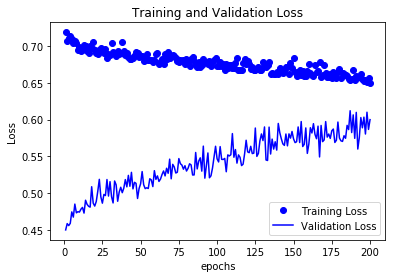

In [29]:
plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

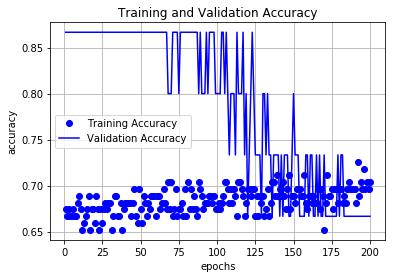

In [30]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy") 
plt.grid()
plt.legend()
plt.show()